In [1]:
import torch
torch.__version__

'2.1.0+cu121'

In [2]:
import fastai
fastai.__version__

'2.7.14'

In [3]:
from fastai.vision.all import*

In [4]:
import os

In [5]:
!unzip '/content/flowers.zip'

Archive:  /content/flowers.zip
   creating: flowers/daisy/
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/105558265

In [6]:
data_path='/content/flowers'

In [7]:
class_n =[]
for folder_name in os.listdir('/content/flowers'):
  class_n.append(folder_name)

In [9]:
class_n

['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']

In [10]:
image_paths=[]
labels=[]

for i in range (len(class_n)):
  class_name=class_n[i]
  image_names=os.listdir(f'{data_path}/{class_name}')
  for image_name in image_names:
    image_path=(f'{data_path}/{class_name}/{image_name}')
    image_paths.append(image_path)
    labels.append(i)

In [12]:
import pandas as pd


df=pd.DataFrame({
    'name':image_paths,
    'label':labels

})

In [13]:
df

name  label
0      /content/flowers/dandelion/5129135346_3fa8e804d8_n.jpg      0
1       /content/flowers/dandelion/16375088191_2bf2916b53.jpg      0
2         /content/flowers/dandelion/674407101_57676c40fb.jpg      0
3      /content/flowers/dandelion/2521827947_9d237779bb_n.jpg      0
4     /content/flowers/dandelion/19617501581_606be5f716_n.jpg      0
...                                                       ...    ...
4321       /content/flowers/rose/15094168139_8f636ffa1d_n.jpg      4
4322       /content/flowers/rose/19153732586_9de58c8f53_n.jpg      4
4323       /content/flowers/rose/15174615529_144ae28bdb_n.jpg      4
4324          /content/flowers/rose/8337607102_d9e0fa887e.jpg      4
4325        /content/flowers/rose/5002446614_bb2a5b4bc1_n.jpg      4

[4326 rows x 2 columns]

In [14]:
df.to_csv(path_or_buf=f'{data_path}/labels.csv',index=False)

In [15]:
df

name  label
0      /content/flowers/dandelion/5129135346_3fa8e804d8_n.jpg      0
1       /content/flowers/dandelion/16375088191_2bf2916b53.jpg      0
2         /content/flowers/dandelion/674407101_57676c40fb.jpg      0
3      /content/flowers/dandelion/2521827947_9d237779bb_n.jpg      0
4     /content/flowers/dandelion/19617501581_606be5f716_n.jpg      0
...                                                       ...    ...
4321       /content/flowers/rose/15094168139_8f636ffa1d_n.jpg      4
4322       /content/flowers/rose/19153732586_9de58c8f53_n.jpg      4
4323       /content/flowers/rose/15174615529_144ae28bdb_n.jpg      4
4324          /content/flowers/rose/8337607102_d9e0fa887e.jpg      4
4325        /content/flowers/rose/5002446614_bb2a5b4bc1_n.jpg      4

[4326 rows x 2 columns]

In [16]:
dls=ImageDataLoaders.from_folder(
    path=data_path,
    item_tfms=Resize(460),
    batch_size=30,
    batch_tfms=aug_transforms(size=224),
    valid_pct=0.2)


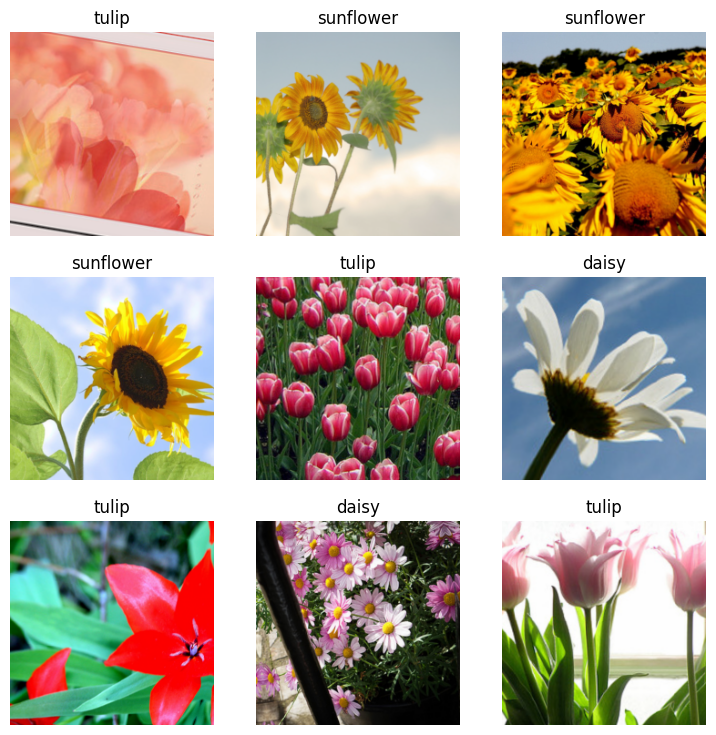

In [ ]:
dls.show_batch()

SuggestedLRs(valley=2.2908675418875646e-06)

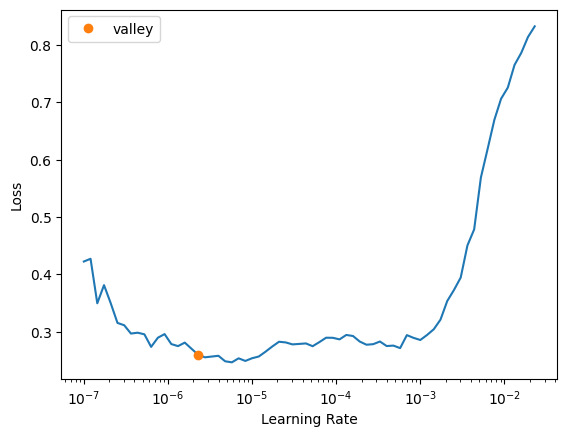

In [27]:
learn.lr_find()

In [17]:
learn=cnn_learner(dls,resnet34,metrics=[accuracy,error_rate])
learn.summary()

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 129MB/s]


Sequential (Input shape: 30 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     30 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     30 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

In [18]:
learn.fine_tune(1)

In [19]:
learn.predict(image_paths[0])

('dandelion',
 tensor(1),
 tensor([5.4816e-07, 1.0000e+00, 1.8656e-08, 2.8047e-07, 8.1267e-09]))

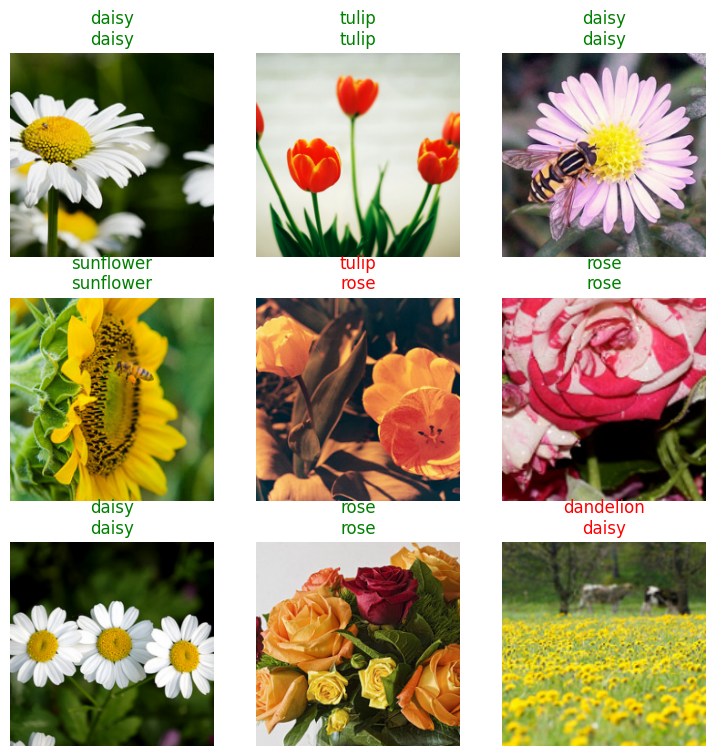

In [ ]:
learn.show_results()

In [20]:
interpret=Interpretation.from_learner(learn)

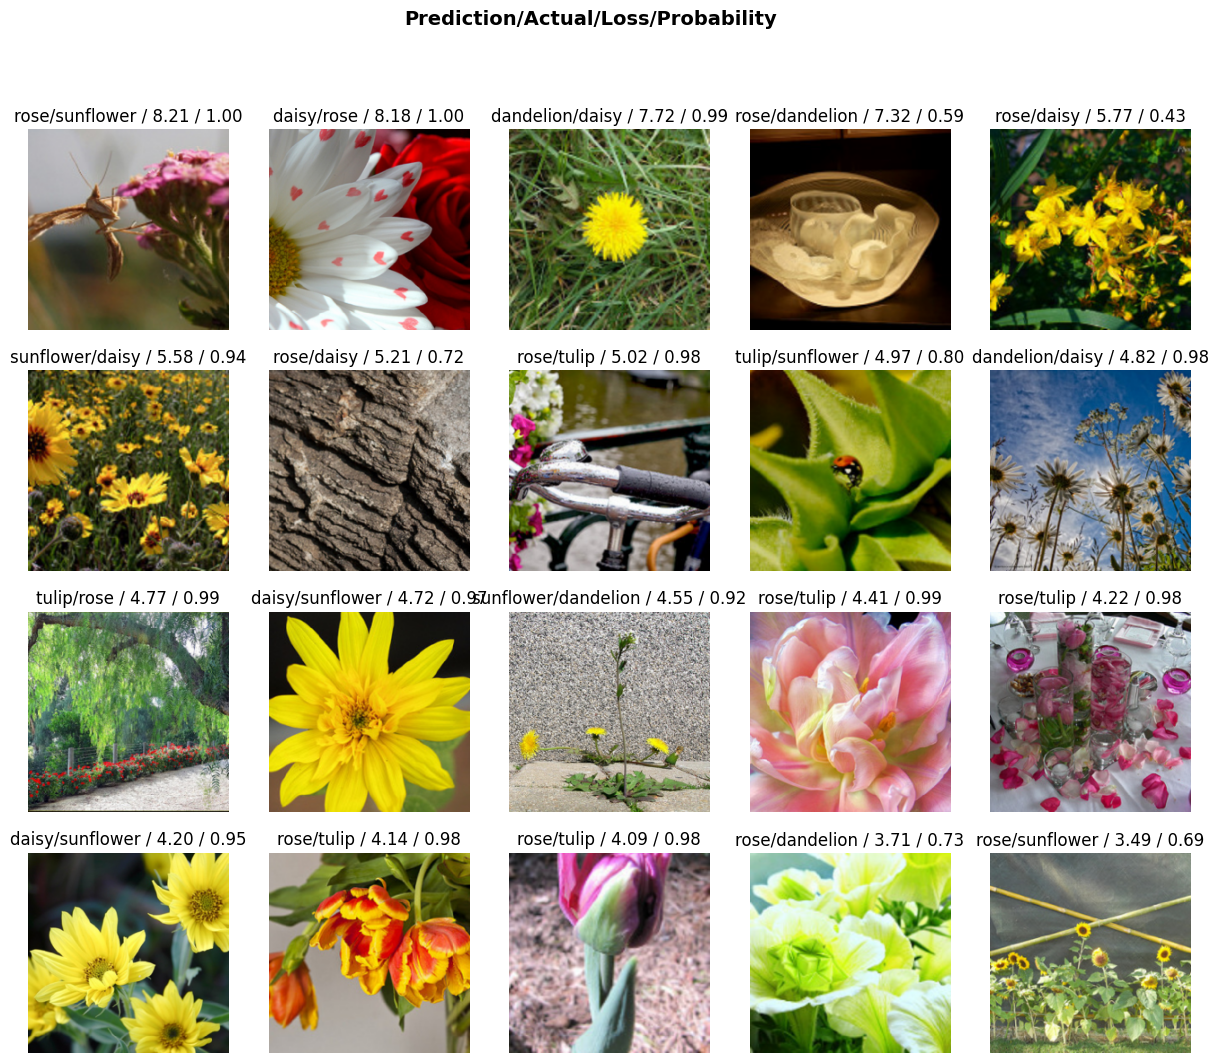

In [21]:
interpret.plot_top_losses(k=20)

In [28]:
interp2=ClassificationInterpretation.from_learner(learn)

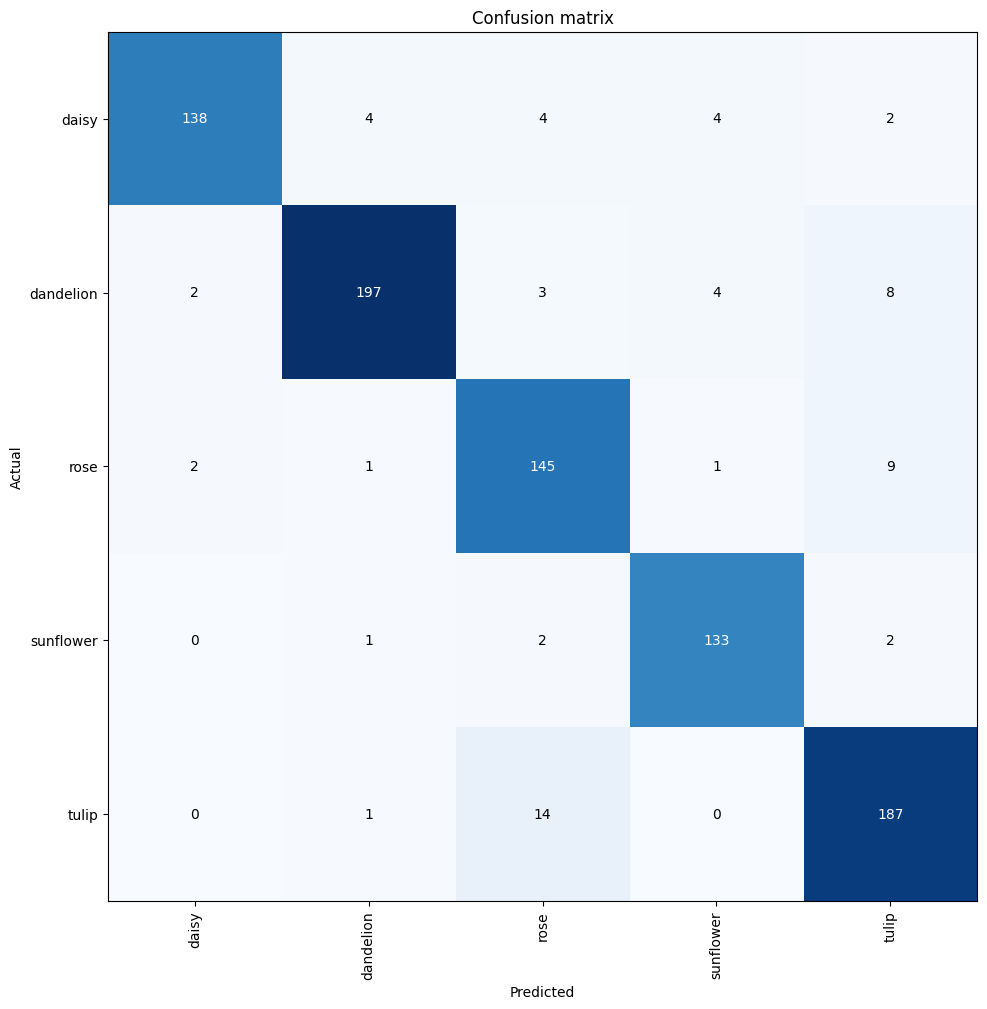

In [29]:
interp2.plot_confusion_matrix(figsize=(15,10))

In [22]:
learn.export('Flower_Classification.pkl')

In [23]:
new_model=load_learner(f'{data_path}/Flower_Classification.pkl')

In [24]:
new_model.predict(image_paths[15])



('dandelion',
 tensor(1),
 tensor([6.3005e-05, 9.9985e-01, 5.4838e-05, 2.2978e-05, 1.0800e-05]))

In [25]:
new_model.save('Flower_Classification')

Path('/content/flowers/models/Flower_Classification.pth')